Total geral pago em 2021: R$ 42.283.352.041


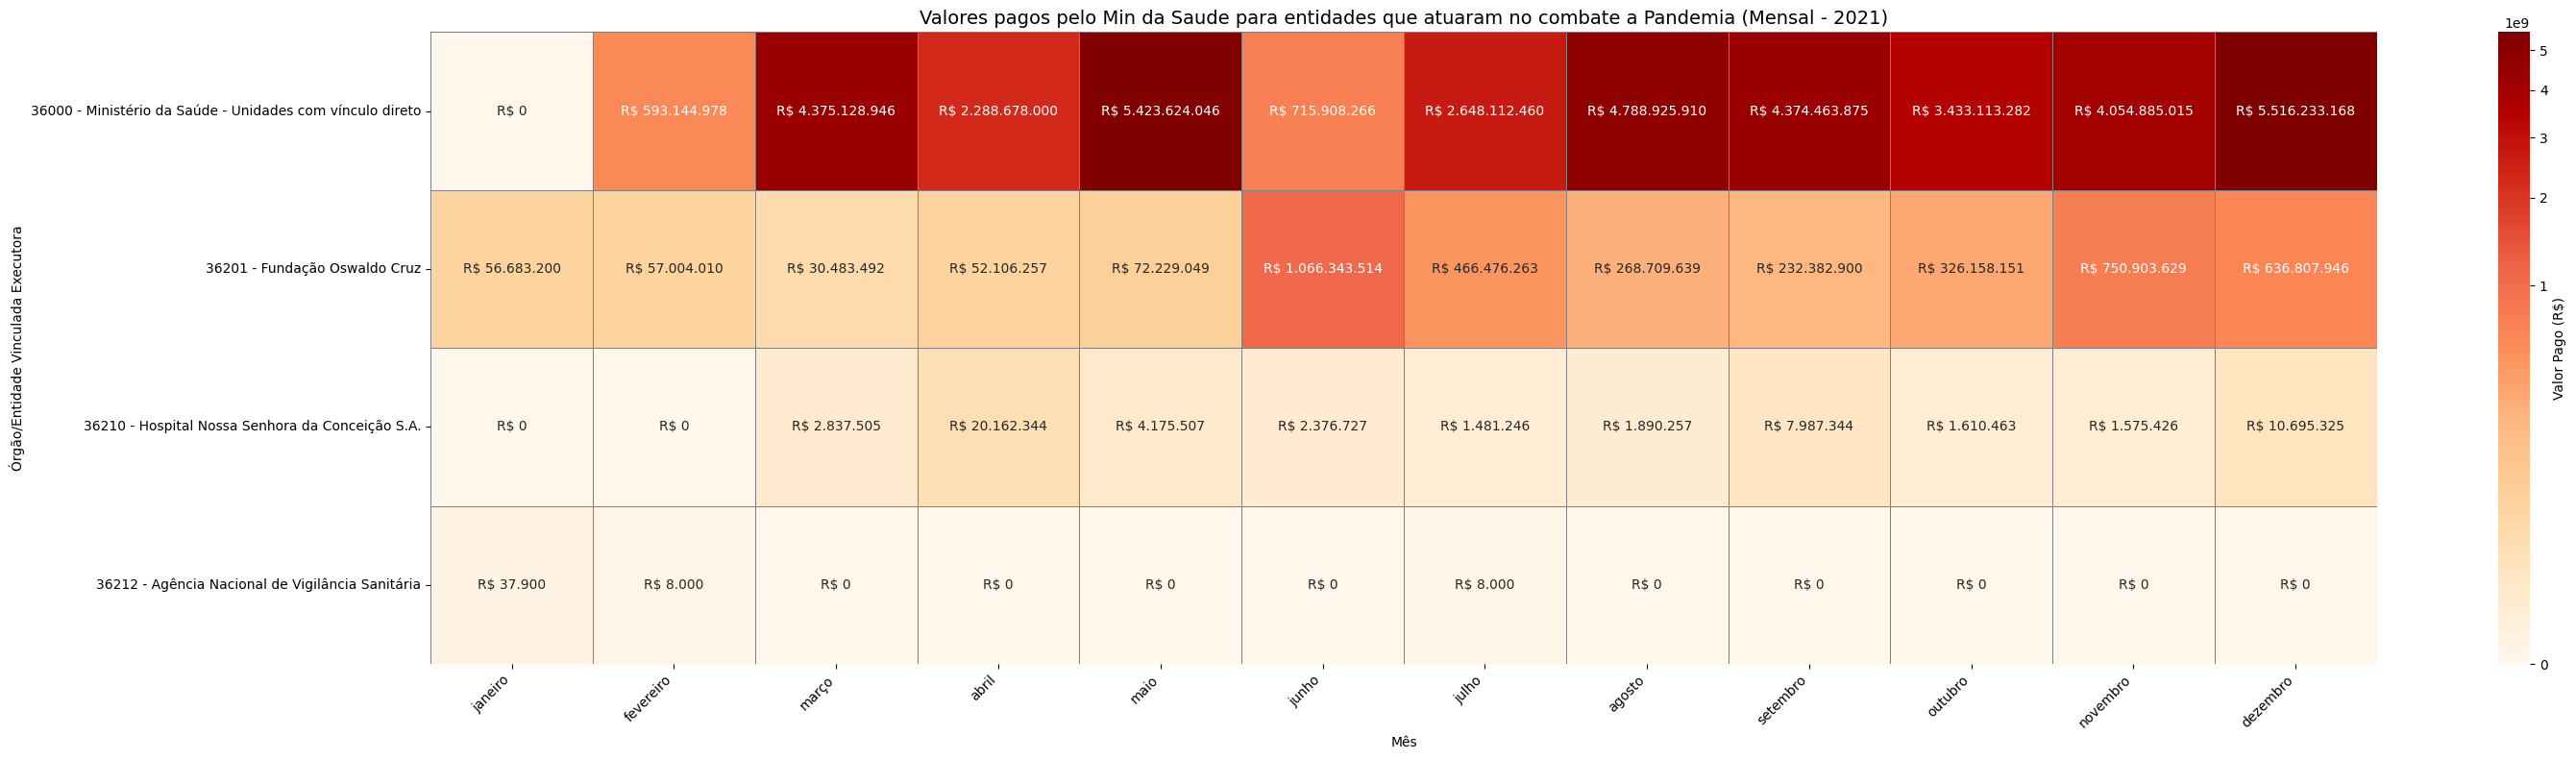

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import locale
from matplotlib.colors import PowerNorm


locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')
# 1. Carregar os dados
df = pd.read_csv(
    "/home/nandowsl/git/projetosNandoJava/ProjetoAnaliseDeDadosPython/CovidNoBrasil/dados/frentesDeputados.csv",
    sep=';',
    encoding='utf-8'
)

# 2. Converter Mês Ano para datetime
df["Mês Ano"] = pd.to_datetime(df["Mês Ano"], format="%m/%Y")

# 3. Filtrar apenas 2021
df = df[df["Mês Ano"].dt.year == 2021]

# 4. Criar coluna com nome do mês
df["Mês Nome"] = df["Mês Ano"].dt.month.apply(lambda x: calendar.month_name[x])

# 5. Limpar e converter valores para float
df["Valor Pago"] = df["Valor Pago"].astype(str)
df["Valor Pago"] = df["Valor Pago"].str.replace(".", "", regex=False)
df["Valor Pago"] = df["Valor Pago"].str.replace(",", ".", regex=False)
df["Valor Pago"] = pd.to_numeric(df["Valor Pago"], errors="coerce")

# 6. Agrupar por mês e órgão
df_grouped = df.groupby(["Mês Nome", "Órgão/Entidade Vinculada Executora"])["Valor Pago"].sum().reset_index()

# 7. Ordenar os meses corretamente
meses_ordenados = list(calendar.month_name)[1:]  # De Janeiro a Dezembro
df_grouped["Mês Nome"] = pd.Categorical(df_grouped["Mês Nome"], categories=meses_ordenados, ordered=True)

# 8. Pivotar
df_pivot = df_grouped.pivot(index="Órgão/Entidade Vinculada Executora", columns="Mês Nome", values="Valor Pago").fillna(0)

# 9. Função de formatação para reais
def formatar_reais(x):
    return f'R$ {x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", ".")

# 10. Plotar heatmap
# 1. Define uma normalização com gamma < 1 para realçar valores baixos
norma = PowerNorm(gamma=0.3, vmin=0, vmax=df_pivot.max().max())

# 2. Criar o heatmap com essa normalização
plt.figure(figsize=(30, max(8, len(df_pivot) * 0.4)))

sns.heatmap(
    df_pivot,
    cmap="OrRd",  # Cores mais perceptíveis para valores baixos
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=".0f",
    cbar_kws={"label": "Valor Pago (R$)"},
    norm=norma
)

total_pago = df["Valor Pago"].sum()
print("Total geral pago em 2021:", formatar_reais(total_pago))

# Formatar valores em reais nos rótulos das células
for t in plt.gca().texts:
    val = float(t.get_text())
    t.set_text(formatar_reais(val))

plt.title("Valores pagos pelo Min da Saude para entidades que atuaram no combate a Pandemia (Mensal - 2021)", fontsize=14,)
plt.xlabel("Mês")
plt.ylabel("Órgão/Entidade Vinculada Executora")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
